<a href="https://colab.research.google.com/github/farsashraf/farsashraf/blob/main/yaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

In [314]:
data = pd.read_csv('/content/yaret.csv')
data.head()

,age,sex,city,pref_Hobby,pref_donation,another_type_donation,donate_way,donate_number,income
0,15,f,Kafr El-Sheikh,read,education,things,online,1,3000
1,54,m,Giza,sports,health,time,himself,3,5000
2,31,f,the new Valley,music,Poverty,skills,mobile,2,4000
3,17,f,Western,rarts,environment,knowledge,email,5,3500
4,34,f,Menoufia,music,health,things,mobile,4,6000


In [315]:
cols_name = ['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income']
data.columns = cols_name
data.head()

,age,sex,city,pref_hobby,pref_donate,donate_type,donate_way,donate_number,income
0,15,f,Kafr El-Sheikh,read,education,things,online,1,3000
1,54,m,Giza,sports,health,time,himself,3,5000
2,31,f,the new Valley,music,Poverty,skills,mobile,2,4000
3,17,f,Western,rarts,environment,knowledge,email,5,3500
4,34,f,Menoufia,music,health,things,mobile,4,6000


In [316]:
data.drop(['pref_hobby'] ,axis = 1 , inplace = True)

In [317]:
df = data.copy()

In [318]:
encoded_data_sex={
    'm' : 0,
    'f' : 1
}

encoded_data_city = {
'Alexandria' : 1,
'Aswan' : 2,
'Asyut' : 3,
'Bani Sweif' : 4,
'Cairo' : 5,
'Damietta' : 6,
'Eastern' : 7 ,
'Fayoum' : 8 ,
'Giza' : 9 ,
'Ismailia' : 10,
'Kafr El-Sheikh' : 11 ,
'Mansoura' : 12 ,
'Marsa Matrouh' : 13,
'Menoufia' : 14 ,
'Minya' : 15,
'North Sinai' : 16 ,
'Port Said' : 17,
'Qalyubia' : 18,
'Sohag': 19,
'South of Sinaa' :20 ,
'Suez': 21 ,
'the lake': 22 ,
'the new Valley': 23,
'The Red Sea': 24,
'the shortest':25 ,
'Western' :26,
'Qena': 27
}

encoded_data_pref_donate = {
   'education' : 1,
   'health' : 2,
   'Poverty' : 3,
   'environment' :4,
}

encoded_data_donate_type = {
   'things' : 1,
   'time' : 2,
   'skills' : 3,
   'knowledge' :4,
}

encoded_data_donate_way = {
   'online' : 1,
   'himself' : 2,
   'mobile' : 3,
   'email' :4,
}

In [319]:
def encode_columns(encdata,col_name):
  new_data =[]
  for item in col_name:
     if(item in encdata.keys()):
         new_data.append(encdata[item])
  return new_data

In [320]:
df['sex'] = encode_columns(encoded_data_sex, data['sex'])

In [321]:
df['city'] = encode_columns(encoded_data_city, data['city'])

In [322]:
df['pref_donate']= encode_columns(encoded_data_pref_donate, data['pref_donate'])

In [323]:
df['donate_type'] = encode_columns(encoded_data_donate_type, data['donate_type'])

In [324]:
df['donate_way'] = encode_columns(encoded_data_donate_way, data['donate_way'])

In [325]:
df.head()

,age,sex,city,pref_donate,donate_type,donate_way,donate_number,income
0,15,1,11,1,1,1,1,3000
1,54,0,9,2,2,2,3,5000
2,31,1,23,3,3,3,2,4000
3,17,1,26,4,4,4,5,3500
4,34,1,14,2,1,3,4,6000


In [326]:
df.drop(['age', 'sex', 'donate_number', 'income'], axis = 1, inplace =True)

In [327]:
df

,city,pref_donate,donate_type,donate_way
0,11,1,1,1
1,9,2,2,2
2,23,3,3,3
3,26,4,4,4
4,14,2,1,3
...,...,...,...,...
9994,25,1,2,1
9995,10,2,4,2
9996,2,3,1,3
9997,16,3,3,4


In [328]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

def elbow_method(data1, max_k):
    means= []
    inertias= []
    for k in range(1, max_k):
      km = KMeans(n_clusters=k)
      km.fit(data1)
      means.append(k)
      inertias.append(km.inertia_)

    fig = plt.subplots(figsize =(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

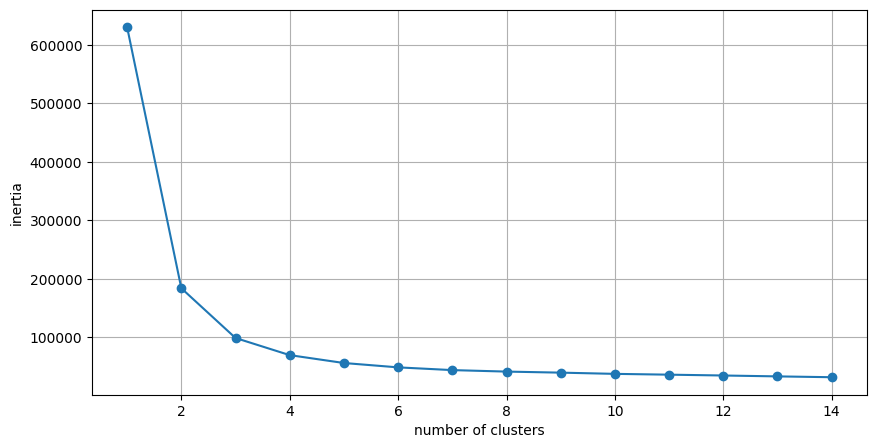

In [329]:
elbow_method(df, 15)

In [330]:
data_plot = data

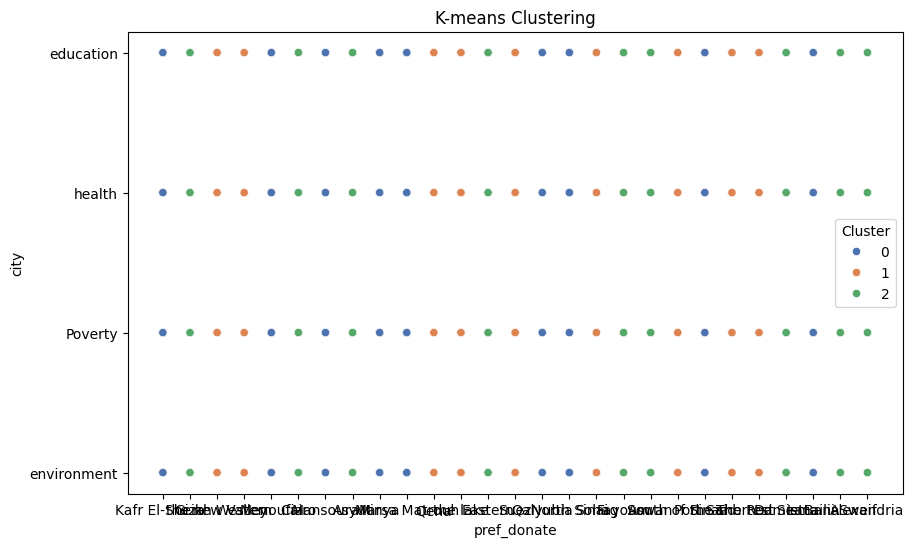

In [331]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10,  max_iter=300, random_state=42)
kmeans.fit(df)

data_plot['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_plot, x=data_plot['city'], y=data_plot['pref_donate'], hue='Cluster', palette='deep', legend='full')
plt.title('K-means Clustering')
plt.xlabel('pref_donate')
plt.ylabel('city')
plt.show()

In [332]:
from sklearn.metrics import silhouette_score
result = kmeans.labels_
print(silhouette_score(df, result))

0.4903619360295795


In [333]:
from sklearn.metrics import calinski_harabasz_score
result = kmeans.labels_
print(calinski_harabasz_score(df, result))

26893.355147253755


In [334]:
from sklearn.metrics import davies_bouldin_score
result = kmeans.labels_
print(davies_bouldin_score(df, result))

0.6635160980670566


In [335]:
cluster_data_dict = {}

for cluster_label in set(data_plot['Cluster']):
    cluster_data = data_plot[data_plot['Cluster'] == cluster_label]
    cluster_data_dict[cluster_label] = cluster_data

for cluster_label, cluster_data in cluster_data_dict.items():
    print(f'Cluster {cluster_label} Data:')
    print(cluster_data)

Cluster 0 Data:
      age sex            city  pref_donate donate_type donate_way  \
0      15   f  Kafr El-Sheikh    education      things     online   
4      34   f        Menoufia       health      things     mobile   
6      25   m        Mansoura  environment      skills     mobile   
8      60   f           Minya       health      things     mobile   
9      59   f   Marsa Matrouh      Poverty      skills      email   
...   ...  ..             ...          ...         ...        ...   
9987   44   f       Port Said      Poverty        time     mobile   
9989   17   f        Menoufia       health   knowledge     mobile   
9993   17   m       Port Said    education      things     mobile   
9995   17   m        Ismailia       health   knowledge    himself   
9997   47   f     North Sinai      Poverty      skills      email   

      donate_number  income  Cluster  
0                 1    3000        0  
4                 4    6000        0  
6                 6   10000        0  

In [336]:
cluster_one = cluster_data_dict[0]
cluster_two = cluster_data_dict[1]
cluster_three = cluster_data_dict[2]

In [337]:
def statistic_method(clus_name):
  word_count = clus_name.value_counts()
  print(word_count)

In [338]:
statistic_method(cluster_one['pref_donate'])
print('\n')

statistic_method(cluster_one['donate_type'])

pref_donate
health         1293
education       883
Poverty         626
environment     598
Name: count, dtype: int64


donate_type
things       1043
knowledge     919
skills        869
time          569
Name: count, dtype: int64


In [339]:
statistic_method(cluster_two['pref_donate'])
print('\n')
statistic_method(cluster_two['donate_type'])


pref_donate
health         1337
education       839
Poverty         627
environment     571
Name: count, dtype: int64


donate_type
things       1020
knowledge     984
skills        876
time          494
Name: count, dtype: int64


In [340]:
user_data =[[30, 'm', 'Qena', 'sports', 'environment', 'things', 'email', '32', 3500]]
new_df = pd.DataFrame(user_data)
new_df.head()

,0,1,2,3,4,5,6,7,8
0,30,m,Qena,sports,environment,things,email,32,3500


In [341]:
cols_name = ['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income']
new_df.columns = cols_name
new_df

,age,sex,city,pref_hobby,pref_donate,donate_type,donate_way,donate_number,income
0,30,m,Qena,sports,environment,things,email,32,3500


In [342]:
new_df.drop(['pref_hobby'] ,axis = 1 , inplace = True)
new_df

,age,sex,city,pref_donate,donate_type,donate_way,donate_number,income
0,30,m,Qena,environment,things,email,32,3500


In [343]:
new_df['sex'] = encode_columns(encoded_data_sex, new_df['sex'])

In [344]:
new_df['city'] = encode_columns(encoded_data_city, new_df['city'])

In [345]:
new_df['pref_donate']= encode_columns(encoded_data_pref_donate, new_df['pref_donate'])

In [346]:
new_df['donate_type'] = encode_columns(encoded_data_donate_type, new_df['donate_type'])

In [347]:
new_df['donate_way'] = encode_columns(encoded_data_donate_way, new_df['donate_way'])

In [348]:
new_df

,age,sex,city,pref_donate,donate_type,donate_way,donate_number,income
0,30,0,27,4,1,4,32,3500


In [349]:
new_df.drop(['age', 'sex', 'donate_number', 'income'], axis = 1, inplace =True)
new_df

,city,pref_donate,donate_type,donate_way
0,27,4,1,4


In [350]:
predection = kmeans.predict(new_df)
predection

array([1], dtype=int32)